# Skin Cancer Classification

In [2]:
import cv2
import pandas as pd
import os

In [3]:
#pip install opencv-python

In [4]:
#pip uninstall opencv-python opencv-python-headless -y --no-cache-dir

In [5]:
labels=['Cancer','Non_Cancer']
img_path='Skin_Data/'

In [6]:
img_list=[]
label_list=[]
for label in labels:
    for img_file in os.listdir(img_path+label):
        img_list.append(img_path+label+'/'+img_file)
        label_list.append(label)

In [7]:
#os.listdir('Skin_Data')

In [8]:
df=pd.DataFrame({'img':img_list,'label':label_list})

In [9]:
df.tail()

,img,label
283,Skin_Data/Non_Cancer/953-1.JPG,Non_Cancer
284,Skin_Data/Non_Cancer/954-3.JPG,Non_Cancer
285,Skin_Data/Non_Cancer/955.JPG,Non_Cancer
286,Skin_Data/Non_Cancer/984.JPG,Non_Cancer
287,Skin_Data/Non_Cancer/986-1.JPG,Non_Cancer


In [10]:
import matplotlib.pyplot as plt

In [11]:
d={'Cancer':1,'Non_Cancer':0}  #20-30 tane olsaydı label_encoder fit transform gibi bir dönüşüm yaparız

In [12]:
df['encode_label']=df['label'].map(d)

In [13]:
df.tail()

,img,label,encode_label
283,Skin_Data/Non_Cancer/953-1.JPG,Non_Cancer,0
284,Skin_Data/Non_Cancer/954-3.JPG,Non_Cancer,0
285,Skin_Data/Non_Cancer/955.JPG,Non_Cancer,0
286,Skin_Data/Non_Cancer/984.JPG,Non_Cancer,0
287,Skin_Data/Non_Cancer/986-1.JPG,Non_Cancer,0


In [14]:
import numpy as np

In [15]:
x=[]
for img in df['img']:
    img=cv2.imread(img)
    img=cv2.resize(img,(170,170)) #boyutunu 170x170 pixel yaptık
    img=img/255.0  #normalzie ettik: 0-1 arasına çevirdik yani 
    x.append(img)

In [16]:
x=np.array(x)

In [17]:
x

array([[[[0.69411765, 0.74901961, 0.95686275],
         [0.6745098 , 0.72941176, 0.9372549 ],
         [0.59607843, 0.64313725, 0.8627451 ],
         ...,
         [0.49411765, 0.62745098, 0.84705882],
         [0.49411765, 0.63137255, 0.85098039],
         [0.51372549, 0.64313725, 0.8627451 ]],

        [[0.63921569, 0.69411765, 0.88627451],
         [0.64313725, 0.69803922, 0.90196078],
         [0.63529412, 0.69803922, 0.90588235],
         ...,
         [0.52156863, 0.63137255, 0.84705882],
         [0.5254902 , 0.63921569, 0.85490196],
         [0.5372549 , 0.64313725, 0.8627451 ]],

        [[0.64313725, 0.70588235, 0.89803922],
         [0.65882353, 0.71372549, 0.91764706],
         [0.64313725, 0.70980392, 0.91372549],
         ...,
         [0.54117647, 0.64705882, 0.86666667],
         [0.56078431, 0.66666667, 0.88627451],
         [0.5372549 , 0.64705882, 0.8627451 ]],

        ...,

        [[0.64313725, 0.74117647, 0.9372549 ],
         [0.62745098, 0.72156863, 0.91764706]

In [18]:
y=df['encode_label']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [21]:
y

0      1
1      1
2      1
3      1
4      1
      ..
283    0
284    0
285    0
286    0
287    0
Name: encode_label, Length: 288, dtype: int64

In [22]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D, Dropout,BatchNormalization, Reshape

In [23]:
model=Sequential()
model.add(Input(shape=(170,170,3)))
model.add(Conv2D(filters=32, kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128)) #10 farklı cevap classification 0-9 a kadar olan rakamlar
model.add(Dense(2, activation="softmax"))
model. compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [24]:
history=model.fit(x_train,y_train,validation_data=(x_test, y_test), epochs=20,verbose=1)

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 599ms/step - accuracy: 0.6581 - loss: 18.0721 - val_accuracy: 0.2759 - val_loss: 2.5709
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 548ms/step - accuracy: 0.5206 - loss: 1.6316 - val_accuracy: 0.7069 - val_loss: 0.6507
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 543ms/step - accuracy: 0.7309 - loss: 0.5769 - val_accuracy: 0.7931 - val_loss: 0.4893
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 545ms/step - accuracy: 0.8436 - loss: 0.4213 - val_accuracy: 0.7414 - val_loss: 0.5369
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 640ms/step - accuracy: 0.8893 - loss: 0.3418 - val_accuracy: 0.8103 - val_loss: 0.4345
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 636ms/step - accuracy: 0.8488 - loss: 0.3443 - val_accuracy: 0.9138 - val_loss: 0.3240
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 644ms/step - accuracy: 0.9096 - loss: 0.2597 - val_accuracy: 0.8621 - val_loss: 0.3465
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 592ms/step - accuracy: 0.9124 - loss: 0.2301 - val_accuracy: 0.8793 - val_loss

In [25]:
model.save('my_cnn_mode.h5')

In [26]:
# VGGNET, Resnet50, Inceptionsv3, Xception, MobileNetV2 Transfer Learning

In [27]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D, Dropout,BatchNormalization, Reshape
from tensorflow.keras.applications import VGG16,ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [29]:
data_dir='Skin_Data'
img_width,img_height=170,170
train_datagen=ImageDataGenerator(rescale=1/255.0, validation_split=.20)
train_datagenerator=train_datagen.flow_from_directory(directory=data_dir,target_size=(170,170),
                                class_mode='binary',subset='training')
test_datagen=ImageDataGenerator(rescale=1/255.0)
test_datagenerator=train_datagen.flow_from_directory(directory=data_dir,target_size=(170,170),
                                class_mode='binary',subset='validation')

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(170, 170, 3))

#base_model=VGG16(weights='imagenet', input_shape=(img_width,img_height,3))

model=Sequential()

model.add(base_model)
for layer in base_model.layers:
    layer.trainable=False

model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(train_datagenerator,epochs=10,validation_data=test_datagenerator)

Found 232 images belonging to 2 classes.
Found 56 images belonging to 2 classes.
Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 30s 4s/step - accuracy: 0.6096 - loss: 2.6691 - val_accuracy: 0.7143 - val_loss: 0.7061
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 33s 4s/step - accuracy: 0.7279 - loss: 0.6475 - val_accuracy: 0.7857 - val_loss: 0.4321
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 32s 4s/step - accuracy: 0.7958 - loss: 0.3854 - val_accuracy: 0.7857 - val_loss: 0.3954
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 29s 4s/step - accuracy: 0.9024 - loss: 0.2285 - val_accuracy: 0.8036 - val_loss: 0.3655
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 34s 4s/step - accuracy: 0.9235 - loss: 0.2277 - val_accuracy: 0.8036 - val_loss: 0.3547
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 35s 5s/step - accuracy: 0.9599 - loss: 0.1684 - val_accuracy: 0.8036 - val_loss: 0.3461
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 35s 4s/step - accuracy: 0.9598 - loss: 0.1466 - val_accuracy: 0.7857 - val_loss: 0.3712
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 39s 5s/step - a

In [30]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 5, 5, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1024)                │      13,108,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │           1,025 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 54,042,437 (206.16 MB)

 Trainable params: 13,109,249 (50.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 26,218,500 (100.02 MB)

In [1]:
#AutoKeras AutoML gibi 

In [3]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [5]:
from tensorflow.keras.preprocessing import image

In [9]:
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

In [11]:
import numpy as np

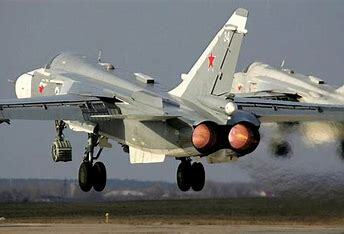

In [23]:
from IPython.display import Image
Image('savasucagi.jpg')

In [25]:
img=image.load_img('savasucagi.jpg',target_size=(224,224))
img=image.img_to_array(img)
img=np.expand_dims(img,axis=0)
img=preprocess_input(img)

In [27]:
model=ResNet50(weights='imagenet')

In [29]:
pred=model.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


In [30]:
decode_predictions(pred, top=1)

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


[[('n04552348', 'warplane', 0.8522521)]]

In [19]:
# CI/CD Continuous Integration / Continuous Development